<div class="alert alert-info">




        
## Logistic and Supply Chain Network:


For its supply chain and its delivery network/vehicles, OnMart has several warehouses and distributions centers. Every warehouse supplies a number of distribution centers and every distribution center delivers packages in different zip codes.  
    

The logistics and supply chain network for OnMart has the following characteristics:
1.	It delivers packages to customers distributed across 785 zip codes 
2.	It has 97 distribution centers that are located in 97 zip codes
3.	It has 17 warehouses that are located in 17 zip codes
4.	It serves customers in 8 cities located in different states in the US
5.	Every serving facility (distribution center or warehouse) has a unique pair of latitude and longitude 

Even though OnMart has many warehouses that supply distribution centers in the different cities, not every city has warehouses; Nashville and Atlanta do not have warehouses. Currently, Nashville is being supplied by products shipped from Chicago warehouses and Atlanta is being supplied by products shipped from Miami warehouses.  The following figure illustrates the structure of the OnMart delivery network:

   
    
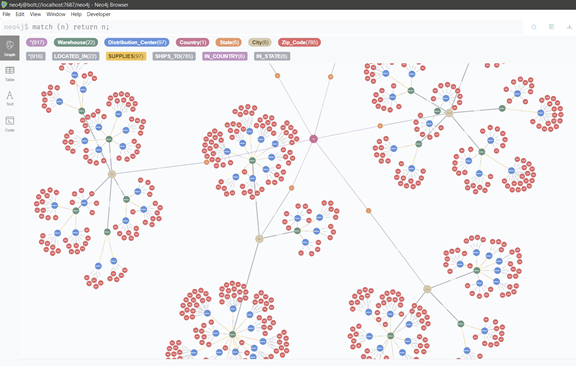
    

    
</div>




<hr style="border:5px solid orange"> </hr>



<div class="alert alert-info">



        
## High Level Description:

The OnMart superstore is an online retailer that has a business model similar to Amazon, Walmart, and Target business models. The online superstore has several departments that are selling products in different categories: Electronics, Clothing, Grocery, Furniture, Sports, etc.

    

    
</div>

<hr style="border:5px solid orange"> </hr>


<br>
<br>
<div class="alert alert-info">

    
The following is a sample of the delivery zip codes, warehouses, distribution centers, cities, and state:
<br>
<br>

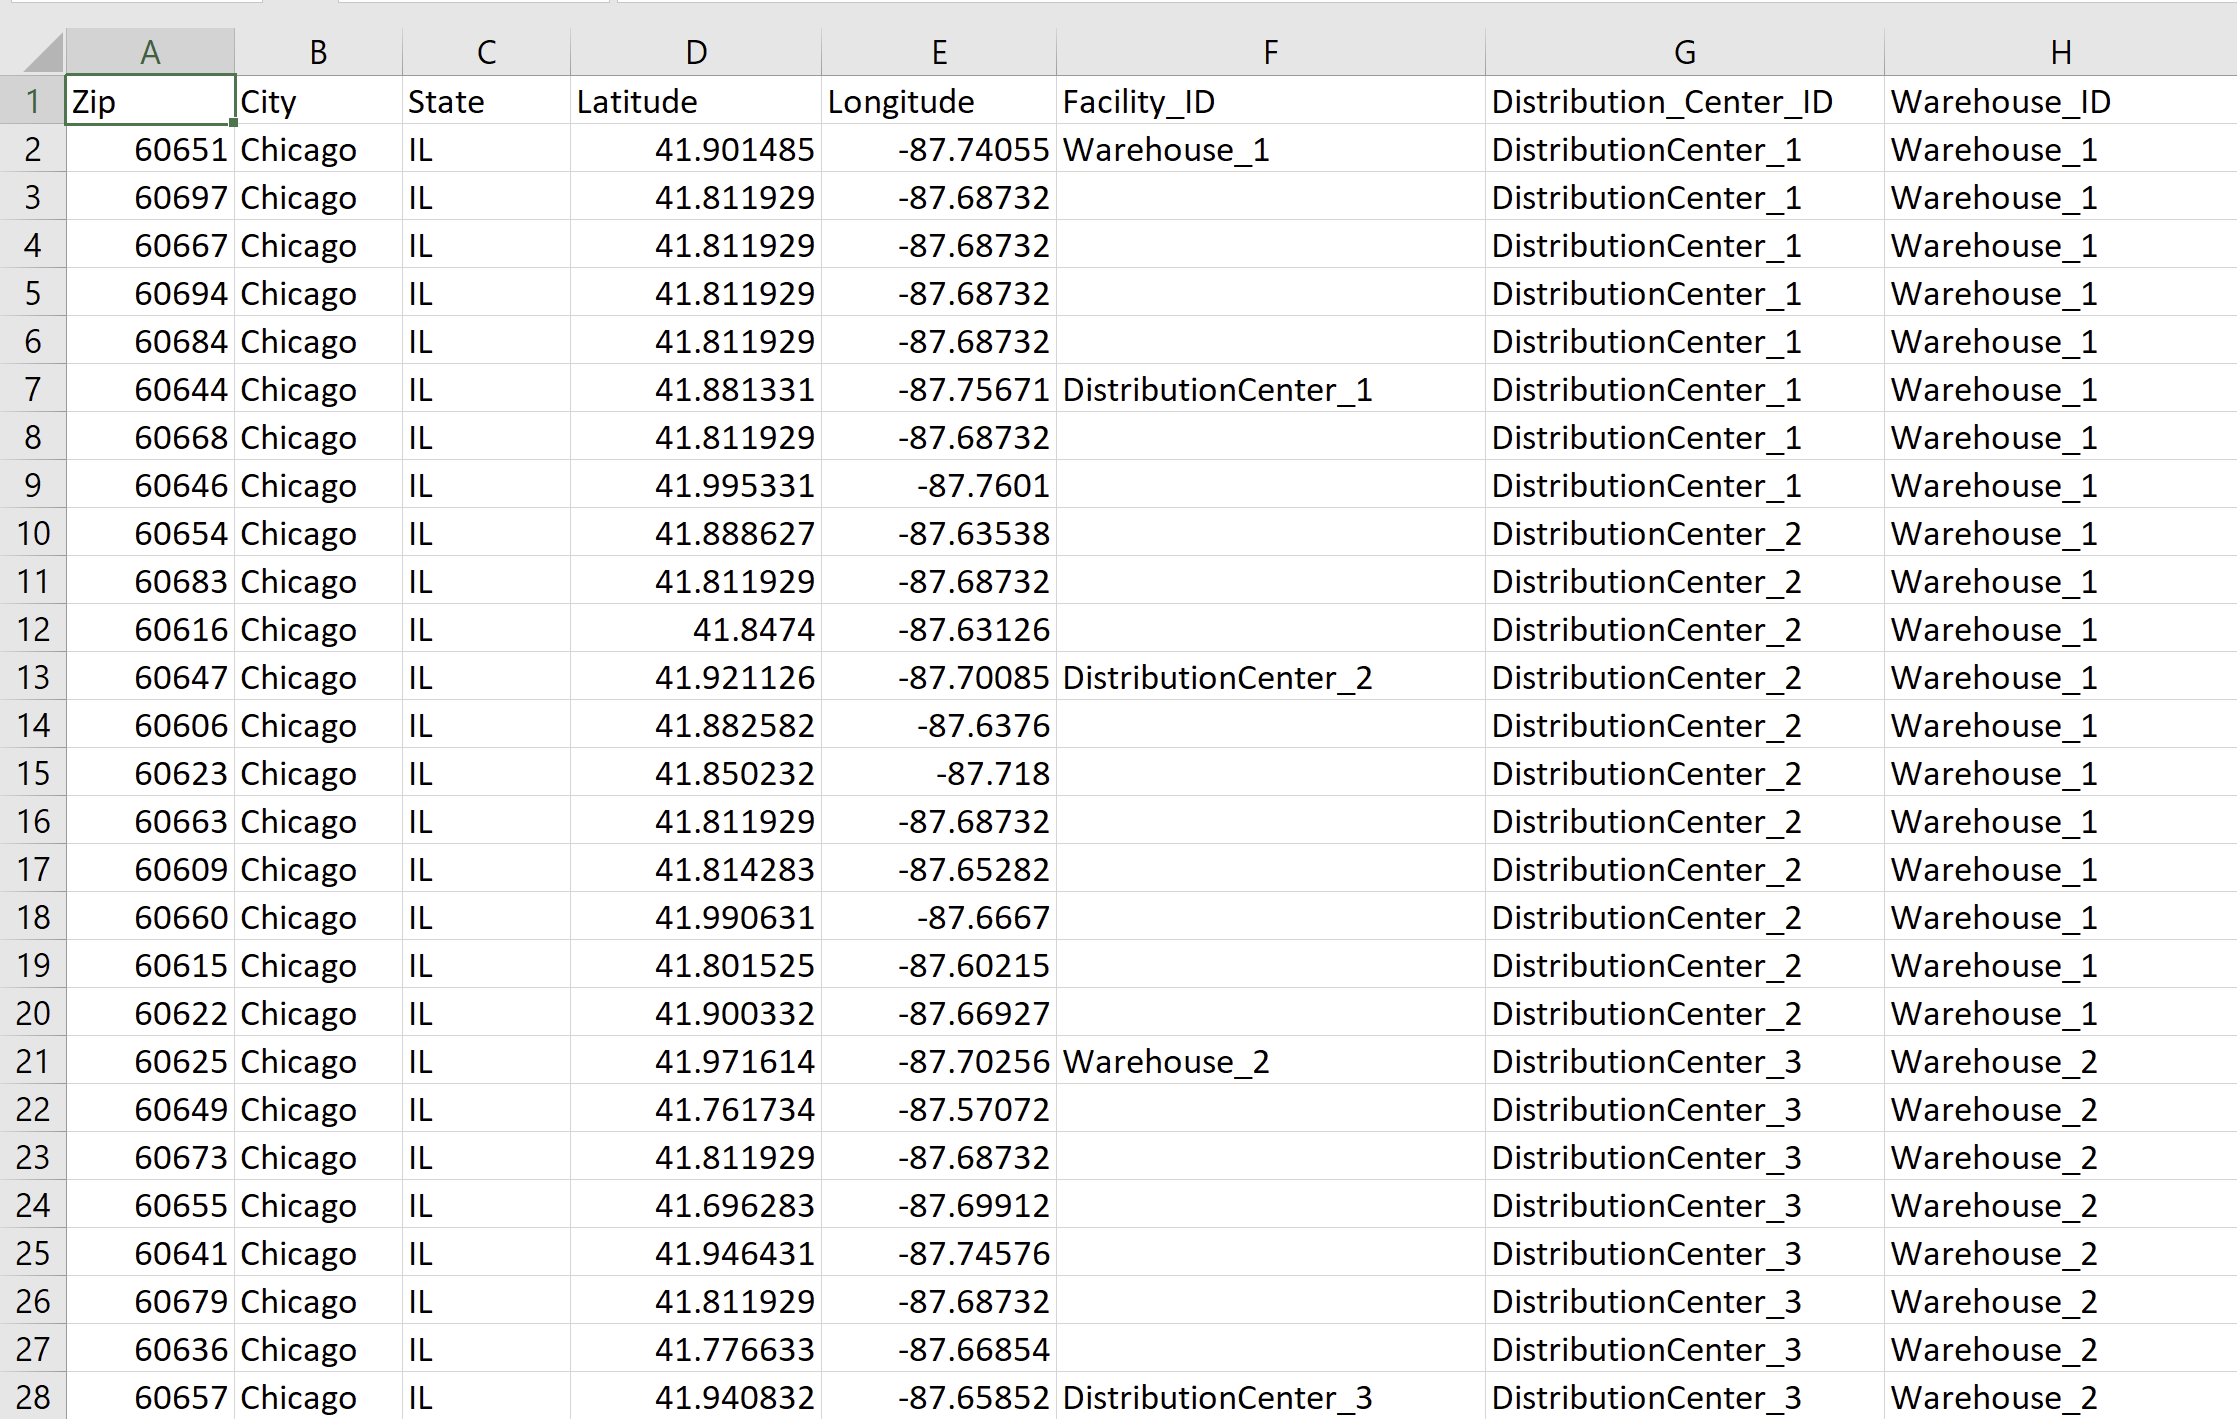

<hr style="border:5px solid orange"> </hr>



<br><br>
<div class="alert alert-info">

# Departments and Products
OnMart has several departments that are selling products in different categories.  The following is a sample of these departments and the different product categories they sell:


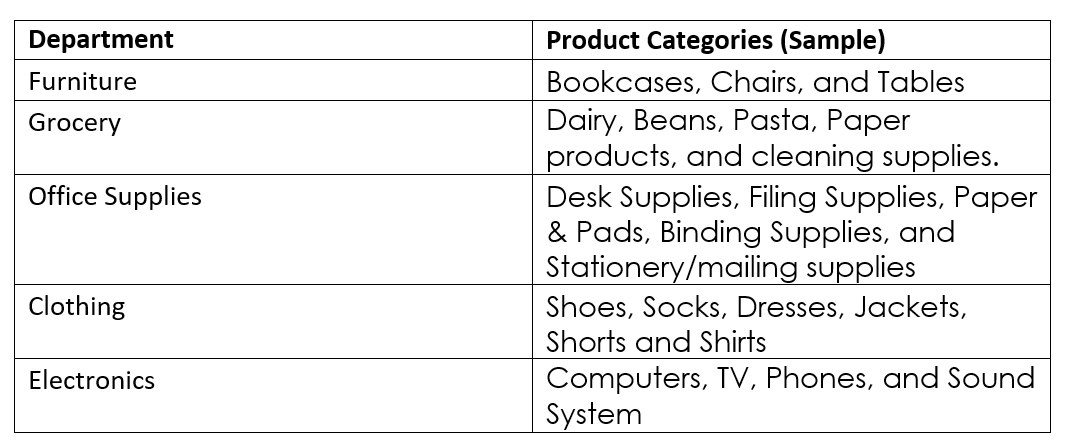

<hr style="border:5px solid orange"> </hr>


<br><br>

<div class="alert alert-info">

# Customers and Purchases


Customers place their orders online and the order might have products from the different categories in the different departments. For every order there will be a unique order number generated. When the customers place the order online, the customer will enter home address, delivery address, and shipping class. 

<br>

The customer is provided with the following capabilities:
- Purchase items.
- Return purchased items. 
- Review and rate purchased items.
- Some customers are connected with friends in a Social Network and can share product description of purchased items with friends in the social network.




<hr style="border:5px solid orange"> </hr>


<div class="alert alert-block alert-danger">
    
    

### Requirements : 
- Connect to OnMart Superstore database using this script to retrieve and analyze its data
- Provide your answers, source code and output, in separate cells below every requirement listed below






<br>
    
</div>

In [6]:
import pandas as pd
import datetime
from datetime import datetime, date, timedelta
import time
import numpy as np
import plotly
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import psycopg2
import csv

from area import area

from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT 


### Check versions:

In [7]:
from platform import python_version
print('python version installed     :', python_version(),'    ,needed: 3.7.7 or higher')
print('plotly version installed     :', plotly.__version__,'   ,needed: 4.14.3 or higher')
print('matplotlib version installed :', matplotlib.__version__,'    ,needed: 3.2.2 or higher')
print('numpy version installed      :', np.__version__,'    ,needed: 1.19.5 or higher')


python version installed     : 3.11.0     ,needed: 3.7.7 or higher
plotly version installed     : 5.14.1    ,needed: 4.14.3 or higher
matplotlib version installed : 3.6.3     ,needed: 3.2.2 or higher
numpy version installed      : 1.23.4     ,needed: 1.19.5 or higher


In [8]:
# Connect to onmart database on Postgres

db_connection = psycopg2.connect(host='hashed',dbname="onmart", user="hashed")

cursor = db_connection.cursor()

In [9]:
# Get the column names for table transactions_log

cursor.execute("SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'transactions_log';")

rows=cursor.fetchall()

rows

[('customerid',),
 ('firstname',),
 ('lastname',),
 ('creditcardnumber',),
 ('orderid',),
 ('purchasedate',),
 ('expecteddeliverydate',),
 ('actualdeliverydate',),
 ('productid',),
 ('department',),
 ('category',),
 ('itempurchased',),
 ('quantity',),
 ('price',),
 ('shippingcost',),
 ('discount',),
 ('sales',),
 ('profit',),
 ('deliveryzipcode',),
 ('homezipcode',),
 ('segment',),
 ('orderpriority',),
 ('orderreturned',),
 ('rating',),
 ('reviewid',),
 ('friends',),
 ('sharedwith',)]

In [10]:
# Get 5 rows from the table transactions_log

cursor.execute("SELECT * from transactions_log limit 5;")

rows=cursor.fetchall()

rows

[('438-41-0336',
  'Camryn',
  'Collins',
  'xxxx-xxxx-xxxx-5349',
  '70fa8d0e-9af4-461a-80d4-e15e4a0221fb',
  datetime.date(2019, 11, 19),
  datetime.date(2019, 11, 23),
  datetime.date(2019, 11, 27),
  'OFF-AP-6485-170',
  'Office Supplies',
  'Appliances',
  'RFID Scanners',
  2,
  326.99,
  25.29,
  24.46,
  654.81,
  65.481,
  '90048',
  '90048',
  'Home Office',
  'Critical',
  'No',
  5,
  '',
  '',
  ''),
 ('272-43-1200',
  'Kian',
  'Cronin',
  'xxxx-xxxx-xxxx-5326',
  'f3814223-cbd7-41af-b4bd-c5fe4b920097',
  datetime.date(2020, 12, 9),
  datetime.date(2020, 12, 13),
  datetime.date(2020, 12, 17),
  'CLO-SH-5447-076',
  'Clothing',
  'Shorts',
  'Flying Machine Denim Shorts',
  4,
  11.8,
  2.83,
  1.67,
  48.36,
  3.3852,
  '33283',
  '33283',
  'Corporate',
  'Critical',
  'No',
  -1,
  '14223-cbd7',
  '',
  ''),
 ('667-64-3631',
  'Harry',
  'Hickle',
  'xxxx-xxxx-xxxx-5014',
  '940c6892-6e1c-4b7b-82b8-195cfde04fee',
  datetime.date(2018, 10, 31),
  datetime.date(2018, 11,

In [11]:
# Get the column names for table logistics_supply_chain_network

cursor.execute("SELECT column_name FROM INFORMATION_SCHEMA.COLUMNS WHERE table_name = 'logistics_supply_chain_network';")

rows=cursor.fetchall()

rows

[('zipcode',),
 ('city',),
 ('state',),
 ('latitude',),
 ('longitude',),
 ('facility_id',),
 ('distribution_center_id',),
 ('warehouse_id',),
 ('where_is',)]

In [12]:
# Get 5 rows from the table logistics_supply_chain_network

cursor.execute("SELECT * from logistics_supply_chain_network limit 5;")

rows=cursor.fetchall()

rows

[('60651',
  'Chicago',
  'IL',
  41.901485,
  -87.74055,
  'Warehouse_1',
  'DistributionCenter_1',
  'Warehouse_1',
  None),
 ('60697',
  'Chicago',
  'IL',
  41.811929,
  -87.68732,
  '',
  'DistributionCenter_1',
  'Warehouse_1',
  None),
 ('60667',
  'Chicago',
  'IL',
  41.811929,
  -87.68732,
  '',
  'DistributionCenter_1',
  'Warehouse_1',
  None),
 ('60694',
  'Chicago',
  'IL',
  41.811929,
  -87.68732,
  '',
  'DistributionCenter_1',
  'Warehouse_1',
  None),
 ('60684',
  'Chicago',
  'IL',
  41.811929,
  -87.68732,
  '',
  'DistributionCenter_1',
  'Warehouse_1',
  None)]


<div class="alert alert-info">
<hr style="border:5px solid orange"> </hr>

    

### Complete all requirements listed below
- Write your code in the cell below every requirement



<hr style="border:5px solid orange"> </hr>

    
</div>


<div class="alert alert-block alert-danger">
    
    

### Requirement 1: 
- Count the total number of order returns per Delivery Zip Code  **( Use SQL - Postgres )**





<br>
    
</div>

In [13]:
# SQL Query
cursor.execute("""SELECT deliveryzipcode, 
               COUNT(orderid) as order_count FROM transactions_log 
               WHERE orderreturned = 'Yes' 
               GROUP BY deliveryzipcode
               ORDER BY order_count DESC;""")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
orderreturns_df = pd.DataFrame(rows, columns=["DeliveryZipCode", "ReturnedOrders"])

# Setting index to zipcode and sorting by number of orders returned for each zipcode
orderreturns_df = orderreturns_df.set_index('DeliveryZipCode')
orderreturns_df = orderreturns_df.sort_values(by=['ReturnedOrders'], ascending=False)

# Print the result
display(orderreturns_df.head())
display(orderreturns_df.tail())

,ReturnedOrders
DeliveryZipCode,
75202,1421
60660,1411
75210,1395
75218,1386
60649,1386


,ReturnedOrders
DeliveryZipCode,
30337,731
30381,730
2211,727
31131,724
90046,706


<i> The above query filters to all transactions that have been marked as 'Yes' in orderreturned attribute and summarizes the table into a simple two column dataframe. For brevity, I have displayed the top & bottom 5 zipcodes having highest & lowest number of orders returned in descending order. </i>

<div class="alert alert-block alert-danger">
    
    

### Requirement 2: 
- Count the total number of orders for every product category in every Delivery Zip Code. Sort output by category.  **( Use SQL - Postgres )**






<br>
    
</div>

In [14]:
# SQL Query
cursor.execute("SELECT deliveryzipcode, category, COUNT(orderid) FROM transactions_log GROUP BY category, deliveryzipcode;")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
orders_by_category_df = pd.DataFrame(rows, columns=["DeliveryZipCode", "Category", "TotalOrdersCount"])

# Setting index to zipcode and sorting by number of orders for each zipcode
orders_by_category_df = orders_by_category_df.set_index('DeliveryZipCode')
orders_by_category_df = orders_by_category_df.sort_values(by=['TotalOrdersCount'], ascending=False)

# Print the result
display(orders_by_category_df.head())
display(orders_by_category_df.tail())

,Category,TotalOrdersCount
DeliveryZipCode,,
75212,TShirt,620
60613,Shorts,611
60678,TShirt,607
75204,TShirt,600
60667,TShirt,597


,Category,TotalOrdersCount
DeliveryZipCode,,
75237,Beans,127
33143,Tables,126
33152,Fitness,126
31192,Accessories,126
75277,Nuts,117


<i> The above query counts the number of orders for each delivery zipcode and category combination and summarizes the table into a simple three column dataframe. For brevity, I have displayed the top & bottom 5 combinations having highest & lowest number of orders in descending order. </i>

<div class="alert alert-block alert-danger">
    
### Requirement 3: 
- Calculate the total sales per Delivery Zip Code and the output should be sorted by total sales in descending order **( Use SQL - Postgres )**

<br>
    
</div>

In [15]:
# SQL query
cursor.execute("SELECT deliveryzipcode, SUM(sales) as total_sales FROM transactions_log GROUP BY deliveryzipcode ORDER BY total_sales DESC;")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
sales_by_zip_df = pd.DataFrame(rows, columns=["DeliveryZipCode", "TotalSales"])

# Setting index to zipcode and sorting by amount of sales for each zipcode
sales_by_zip_df = sales_by_zip_df.set_index('DeliveryZipCode')
sales_by_zip_df = sales_by_zip_df.sort_values(by=['TotalSales'], ascending=False)

# Print the result
display(sales_by_zip_df.head())
display(sales_by_zip_df.tail())

,TotalSales
DeliveryZipCode,
60636,6723517.19
75225,6663814.60
60679,6634994.33
75210,6629017.59
60646,6620039.21


,TotalSales
DeliveryZipCode,
75313,3467860.33
75294,3465679.21
90035,3465672.71
30301,3458701.46
33101,3422147.50


<i> The above query summarizes total sales by delivery zip code and outputs the table into a simple two column dataframe. For brevity, I have displayed the top & bottom 5 zipcodes having highest & lowest sales in descending order. </i>

<div class="alert alert-block alert-danger">
    
    

### Requirement 4: 
- Use Seaborn to create a BoxPlot Chart for  total orders count (y-axis) for every product category (x-axis) and delivery Zip Code **( Use Python - SQL - Postgres )**






<br>
    
</div>

,Category,TotalOrdersCount
DeliveryZipCode,,
30315,Accessories,159
2201,Accessories,158
75270,Accessories,172
90089,Accessories,144
75391,Accessories,159


,Category,TotalOrdersCount
DeliveryZipCode,,
60694,Tables,303
10095,Tables,229
60628,Tables,269
75374,Tables,160
10281,Tables,201


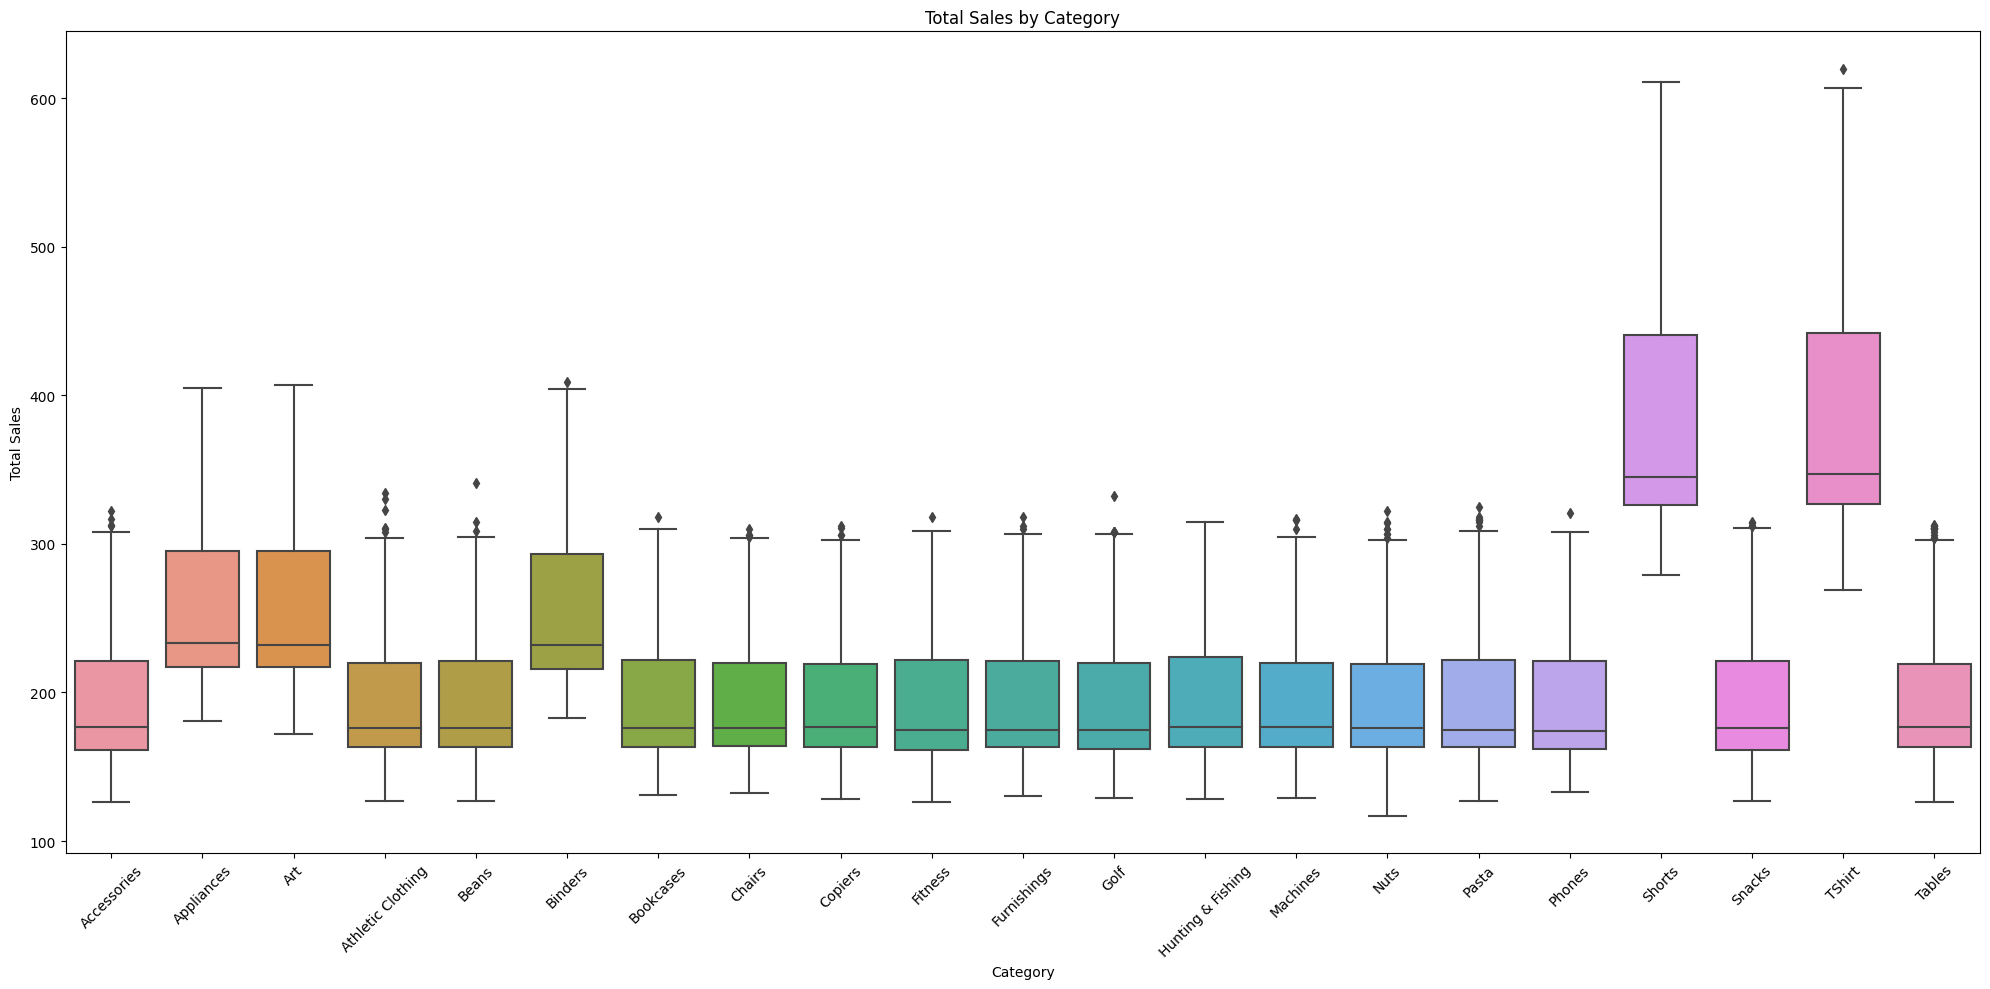

In [16]:
# SQL query
cursor.execute("""SELECT deliveryzipcode, category, COUNT(orderid) 
               FROM transactions_log 
               GROUP BY deliveryzipcode, category;""")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
ordercount_category_zip_df = pd.DataFrame(rows, columns=["DeliveryZipCode", "Category", "TotalOrdersCount"])

# Sorting by category and setting index to delivery zip code
ordercount_category_zip_df = ordercount_category_zip_df.sort_values(by=['Category'])
ordercount_category_zip_df = ordercount_category_zip_df.set_index('DeliveryZipCode')

# Print the result
display(ordercount_category_zip_df.head())
display(ordercount_category_zip_df.tail())

plt.figure(figsize=(20, 10))  # Set the figure size

# Creating box plot for each category to measure the spread of orders to each zipcode
sns.boxplot(data=ordercount_category_zip_df, x="Category", y="TotalOrdersCount")
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")

# Rotate the x-axis labels and adding tight layout for readability
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

<i> The above query counts number of orders for each product category and zipcode combination and summarizes the table into a simple three column dataframe. For brevity, I have displayed top & bottom 5 sample combinations in no particular order. The boxplot captures the tops, bottoms, medians & means for each product category </i>

<div class="alert alert-block alert-danger">
    
    

### Requirement 5: 
- Calculate the total number of orders per product category per Delivery Zip Code per month **( Use Python - SQL - Postgres )**






<br>
    
</div>

In [17]:
# SQL query
cursor.execute("""SELECT purchasedate AS month, deliveryzipcode, category, 
               COUNT(orderid) FROM transactions_log 
               GROUP BY month, deliveryzipcode, category;""")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
category_zip_df = pd.DataFrame(rows, columns=["PurchaseDate", "DeliveryZipCode", "Category", "TotalOrdersCount"])

# Setting date value to datetime format to ensure correct grouping; values sorted chronologically
category_zip_df['PurchaseDate'] = pd.to_datetime(category_zip_df['PurchaseDate'])
category_zip_df = category_zip_df.sort_values(by=['PurchaseDate'])

# Creating a new dataframe that has transactions grouped by date of purchase, with delivery zip code and category as additional attributes
category_zip_monthly_df = category_zip_df.groupby([pd.Grouper(key='PurchaseDate', freq='M'), 'DeliveryZipCode', 'Category']).sum().reset_index()

# Renaming column to Month to make it more accurate and setting index to month
category_zip_monthly_df = category_zip_monthly_df.rename(columns={'PurchaseDate': 'Month'})
category_zip_monthly_df = category_zip_monthly_df.set_index('Month')

# Print the result
print('Top 5 rows')
display(category_zip_monthly_df.head())

print('Bottom 5 rows')
display(category_zip_monthly_df.tail())

Top 5 rows


,DeliveryZipCode,Category,TotalOrdersCount
Month,,,
2018-01-31,10001,Accessories,5
2018-01-31,10001,Appliances,6
2018-01-31,10001,Art,7
2018-01-31,10001,Athletic Clothing,6
2018-01-31,10001,Beans,2


Bottom 5 rows


,DeliveryZipCode,Category,TotalOrdersCount
Month,,,
2020-12-31,91671,Phones,3
2020-12-31,91671,Shorts,12
2020-12-31,91671,Snacks,8
2020-12-31,91671,TShirt,8
2020-12-31,91671,Tables,8


<i> The above query counts number of orders for each month for every product category and zipcode combination and summarizes the table into a simple four column dataframe. For brevity, I have displayed top & bottom 5 sample combinations in chronological order. </i>

<div class="alert alert-block alert-danger">
    
    

### Requirement 6: 
- Use Seaborn to create scatter chart for the 6-months bins for total orders for every product for the following list of Zip Codes: [60623, 60663, 60609, 60660, 60615, 60622]  **( Use Python - SQL - Postgres )**





<br>
    
</div>

In [18]:
# Adding the required zipcodes into a list
zipcodes = [60623, 60663, 60609, 60660, 60615, 60622]

# SQL query 
cursor.execute("""SELECT 
    t.itempurchased, t.category, t.deliveryzipcode, 
    CASE 
        WHEN t.purchasedate BETWEEN '2018-01-01' AND '2018-06-30' THEN '2018-H1' 
        WHEN t.purchasedate BETWEEN '2018-06-01' AND '2018-12-31' THEN '2018-H2' 
        WHEN t.purchasedate BETWEEN '2019-01-01' AND '2019-06-30' THEN '2019-H1' 
        WHEN t.purchasedate BETWEEN '2019-06-01' AND '2019-12-31' THEN '2019-H2' 
        WHEN t.purchasedate BETWEEN '2020-01-01' AND '2020-06-30' THEN '2020-H1' 
        WHEN t.purchasedate BETWEEN '2020-06-01' AND '2020-12-31' THEN '2020-H2'
        WHEN t.purchasedate BETWEEN '2021-01-01' AND '2021-06-30' THEN '2021-H1' 
    END AS purchase_half, 
    COUNT(*) 
FROM transactions_log AS t 
WHERE t.deliveryzipcode IN ('60623', '60663', '60609', '60660', '60615', '60622') 
GROUP BY 
    t.itempurchased, 
    t.category, 
    t.deliveryzipcode, 
    CASE 
        WHEN t.purchasedate BETWEEN '2018-01-01' AND '2018-06-30' THEN '2018-H1' 
        WHEN t.purchasedate BETWEEN '2018-06-01' AND '2018-12-31' THEN '2018-H2' 
        WHEN t.purchasedate BETWEEN '2019-01-01' AND '2019-06-30' THEN '2019-H1' 
        WHEN t.purchasedate BETWEEN '2019-06-01' AND '2019-12-31' THEN '2019-H2' 
        WHEN t.purchasedate BETWEEN '2020-01-01' AND '2020-06-30' THEN '2020-H1' 
        WHEN t.purchasedate BETWEEN '2020-06-01' AND '2020-12-31' THEN '2020-H2'
        WHEN t.purchasedate BETWEEN '2021-01-01' AND '2021-06-30' THEN '2021-H1' 
    END 
ORDER BY t.itempurchased, t.category, t.deliveryzipcode, purchase_half;""")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
bin_df = pd.DataFrame(rows, columns=["Item", "Category", "DeliveryZipCode", "Purchase_Half", "Order_Count"])
groupedbin_df = bin_df.groupby(['Category', 'DeliveryZipCode', 'Purchase_Half'])['Order_Count'].sum().reset_index()

In [19]:
groupedbin_df

,Category,DeliveryZipCode,Purchase_Half,Order_Count
0,Accessories,60609,2018-H1,57
1,Accessories,60609,2018-H2,52
2,Accessories,60609,2019-H1,45
3,Accessories,60609,2019-H2,41
4,Accessories,60609,2020-H1,55
...,...,...,...,...
751,Tables,60663,2018-H2,46
752,Tables,60663,2019-H1,41
753,Tables,60663,2019-H2,48
754,Tables,60663,2020-H1,51


C:\Users\shishirr\AppData\Local\Temp\ipykernel_23072\2176929173.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation = 45, ha='right')


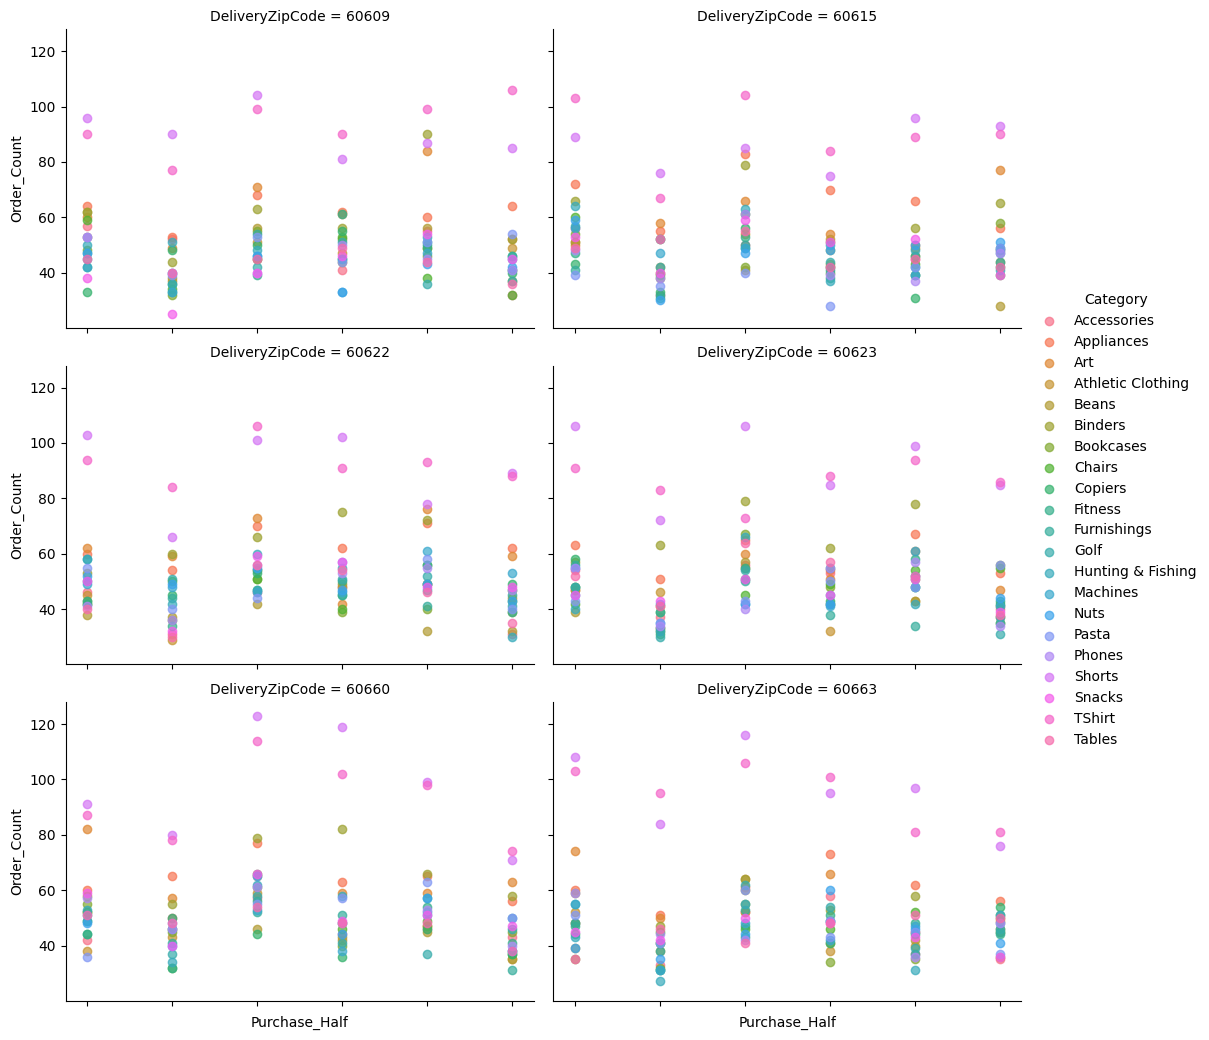

In [20]:
# Creating a scatterplot using Seaborn Facet Grid
g = sns.FacetGrid(groupedbin_df, col='DeliveryZipCode', hue='Category', 
                  margin_titles=True, col_wrap=2, height=3.5, aspect=1.5)
g.map(plt.scatter, 'Purchase_Half', 'Order_Count', alpha=0.7)
ha = ['right', 'center', 'left']

# Looping over each axes to rotate ticklabels for enhanced readability
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation = 45, ha='right')

# Adding tight layout and legend for enhanced readability
plt.tight_layout(h_pad=1)
g.add_legend()

In [21]:
# Adding the required zipcodes into a list
zipcodes = [60623, 60663, 60609, 60660, 60615, 60622]

# SQL query 
cursor.execute("""SELECT actualdeliverydate AS date, category, deliveryzipcode, orderid
FROM transactions_log

WHERE deliveryzipcode in ('60623', '60663', '60609', '60660', '60615', '60622')
               
ORDER BY category;""")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
groupedbin_df = pd.DataFrame(rows, columns=["Date", "Category", "DeliveryZipCode", "Number of Orders"])
groupedbin_df['Date'] = pd.to_datetime(groupedbin_df['Date'])

# Define a function to create 6-month bins
def create_6_month_bin(delivery_date):
    year = delivery_date.year
    month = delivery_date.month
    if month <= 6:
        start_date = f'01-01-{year}'
        end_date = f'30-06-{year}'
    else:
        start_date = f'01-07-{year}'
        end_date = f'31-12-{year}'
    return f'{start_date} to {end_date}'

# Apply the function to create the bins
groupedbin_df['6_month_bin'] = groupedbin_df['Date'].apply(create_6_month_bin)
groupedbin_df = groupedbin_df.groupby(['6_month_bin', 'Category', 'DeliveryZipCode']).size().reset_index(name='Number of Orders')

# Print the result
print('Top 5 rows')
display(groupedbin_df.head())

print('Bottom 5 rows')
display(groupedbin_df.tail())

Top 5 rows


,6_month_bin,Category,DeliveryZipCode,Number of Orders
0,01-01-2018 to 30-06-2018,Accessories,60609,52
1,01-01-2018 to 30-06-2018,Accessories,60615,52
2,01-01-2018 to 30-06-2018,Accessories,60622,42
3,01-01-2018 to 30-06-2018,Accessories,60623,51
4,01-01-2018 to 30-06-2018,Accessories,60660,39


Bottom 5 rows


,6_month_bin,Category,DeliveryZipCode,Number of Orders
870,01-07-2020 to 31-12-2020,Tables,60615,43
871,01-07-2020 to 31-12-2020,Tables,60622,35
872,01-07-2020 to 31-12-2020,Tables,60623,43
873,01-07-2020 to 31-12-2020,Tables,60660,43
874,01-07-2020 to 31-12-2020,Tables,60663,50


<i> The above query filters all orders placed in the aforementioned zip codes, along with delivery date, category, delivery zipcode & order ID attributes.  I transferred the results into a pandas dataframe and used Python to bin all these orders into 6 month bins using the apply function on the delivery date attribute. For brevity, I have displayed top & bottom 5 sample rows in chronological order. </i>

C:\Users\shishirr\AppData\Local\Temp\ipykernel_23072\1523936003.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  _ = axes.set_xticklabels(axes.get_xticklabels(), rotation = 45, ha=ha[0])


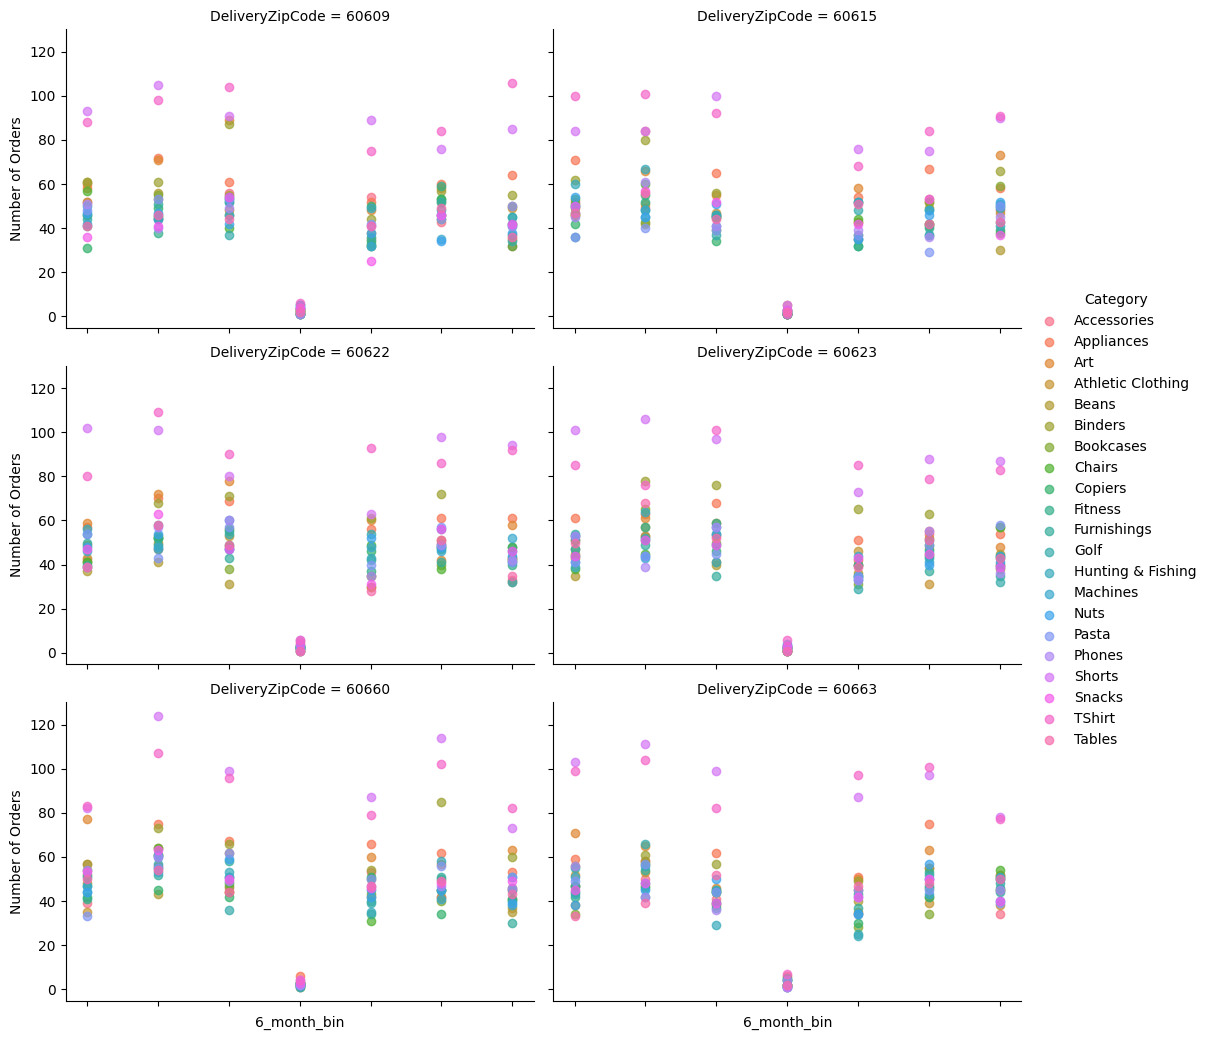

In [22]:
# Creating a scatterplot using Seaborn Facet Grid
g = sns.FacetGrid(groupedbin_df, col='DeliveryZipCode', hue='Category', 
                  margin_titles=True, col_wrap=2, height=3.5, aspect=1.5)
g.map(plt.scatter, '6_month_bin', 'Number of Orders', alpha=0.7)
ha = ['right', 'center', 'left']

# Looping over each axes to rotate ticklabels for enhanced readability
for axes in g.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation = 45, ha=ha[0])

# Adding tight layout and legend for enhanced readability
plt.tight_layout(h_pad=1)
g.add_legend()

<i> The above code adds a scatterplot for each product category's 6-month bin pattern, using delivery zip code as the differentiating characteristic </i>

<div class="alert alert-block alert-danger">
    
    

### Requirement 7:
- List the top 3 distribution centers that have maximum number of delayed deliveries? **( Use SQL - Postgres )**





<br>
    
</div>

In [23]:
cursor.execute("""SELECT transactions_log.actualdeliverydate - transactions_log.expecteddeliverydate as delay, 
               logistics_supply_chain_network.distribution_center_id, COUNT(transactions_log.orderid) as order_count 
               FROM transactions_log JOIN logistics_supply_chain_network ON transactions_log.deliveryzipcode = logistics_supply_chain_network.zipcode 
               GROUP BY delay, logistics_supply_chain_network.distribution_center_id
               HAVING transactions_log.actualdeliverydate - transactions_log.expecteddeliverydate > 0
               ORDER BY order_count DESC limit 3;""")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
dist_center_df = pd.DataFrame(rows, columns=["Delay", "DistributionCenterID","TotalOrdersCount"])

# Sort values by order count and set index to delay period
dist_center_df = dist_center_df.sort_values(by=['TotalOrdersCount'], ascending=False)
dist_center_df = dist_center_df.set_index('Delay')
top_dist_center_df = dist_center_df.head(3)

# Print the result
display(top_dist_center_df)

,DistributionCenterID,TotalOrdersCount
Delay,,
4,DistributionCenter_14,74392
4,DistributionCenter_6,72515
4,DistributionCenter_19,70126


<i> This was a challenging query as I had to derive the delay by calculating the difference between actual delivery date and expected delivery date and then combine the distribution center ID into the table. I passed the query results into a dataframe and have displayed the top 3 distribution center IDs as stated in the requirements. </i>

<div class="alert alert-block alert-danger">
    
    

### Requirement 8: 
- OnMart has allocated the budget for the next quarter to expand its logistics and supply network by adding a new warehouse in the region that has the highest number of orders. Inspect the map below for the list of regions of United States and find the region that has the highest number of orders **( Use Python - SQL - Postgres )**




<br><br>

Source: https://upload.wikimedia.org/wikipedia/commons/f/f1/Census_Regions_and_Division_of_the_United_States.svg

<br><br>
    

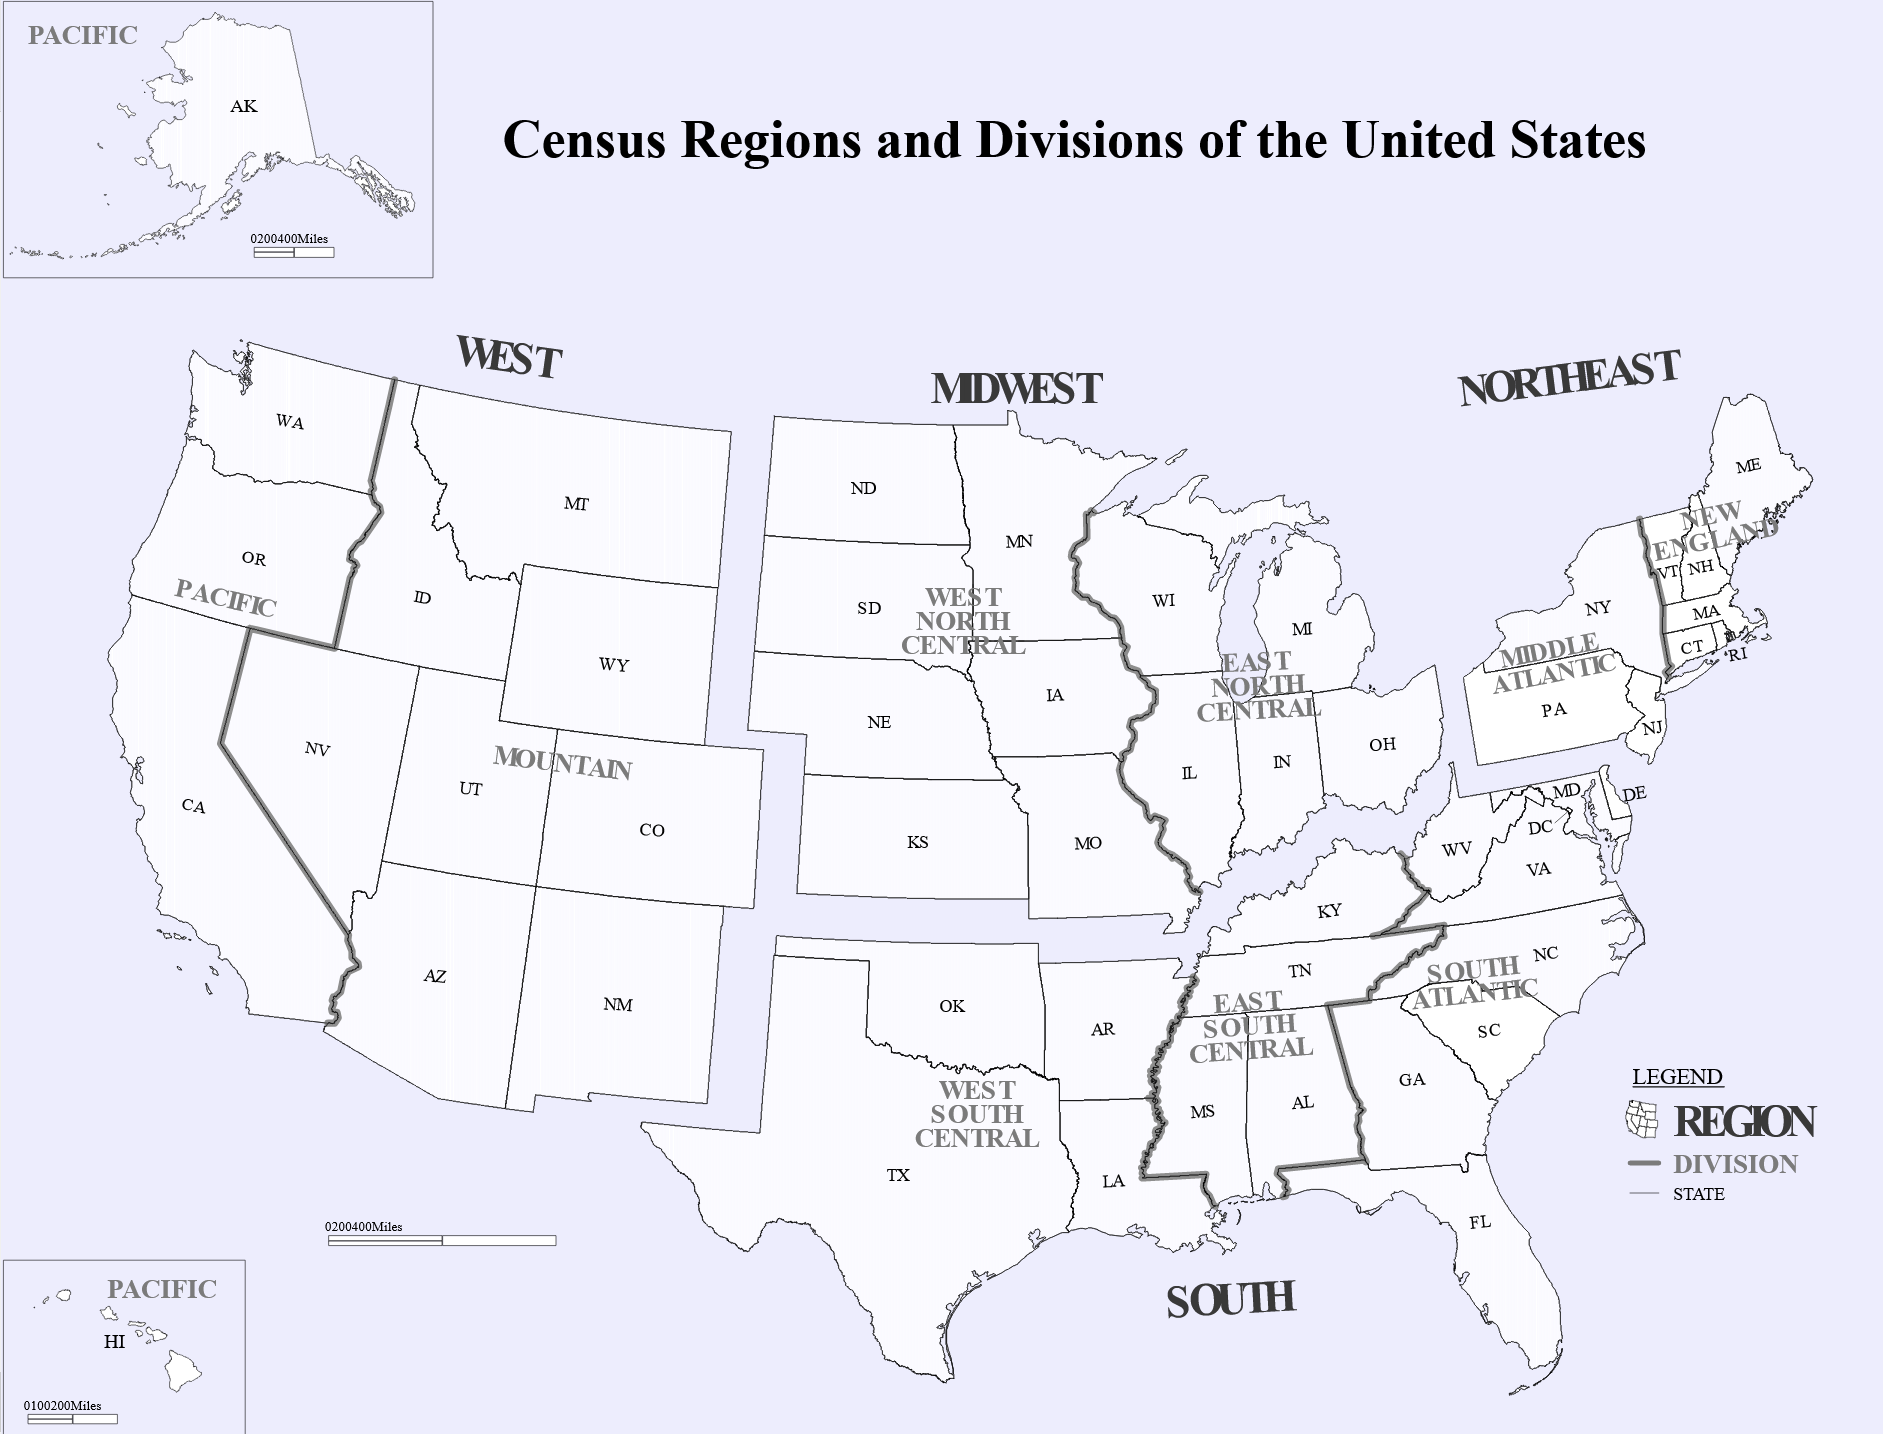
    

<br>
    
</div>

In [24]:
cursor.execute("""SELECT logistics_supply_chain_network.state,
               COUNT(transactions_log.orderid) as order_count 
               FROM transactions_log JOIN logistics_supply_chain_network ON transactions_log.deliveryzipcode = logistics_supply_chain_network.zipcode 
               GROUP BY logistics_supply_chain_network.state
               ORDER BY order_count DESC;""")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
statewise_orders_df = pd.DataFrame(rows, columns=["State","TotalOrdersCount"])

# Sort dataframe by order count and set index to state
statewise_orders_df = statewise_orders_df.sort_values(by=['TotalOrdersCount'], ascending=False)
statewise_orders_df = statewise_orders_df.set_index('State')

# Print the result
display(statewise_orders_df)

,TotalOrdersCount
State,
NY,876511
IL,565063
TX,561383
GA,443226
CA,398918
FL,383846
TN,176292
NJ,5438
NC,4104


<i> Visually inspecting the map above, we note that NY (the state with highest orders as per Query) is in the Middle Atlantic region. The other states are all in different regions and nowhere close to the number of orders NY places. Therefore, the region with highest orders is Middle Atlantic </i>

<div class="alert alert-block alert-danger">
    
    

### Requirement 9: 
- To better plan for hiring hourly temporary workers on the peak-day of the week, OnMart has requested to find the busiest day of the week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday or Sunday) that has the highest average for the number of order deliveries in every zip-code **( Use Python - SQL - Postgres )**






<br>
    
</div>

In [25]:
# SQL query
cursor.execute("""SELECT deliveryzipcode, TO_CHAR(actualdeliverydate::date, 'Day') AS day, COUNT(orderid) as order_count
    FROM transactions_log
    GROUP BY deliveryzipcode, day
    ORDER BY order_count DESC;""")

rows=cursor.fetchall()

rows

# Pass rows into a pandas dataframe for further processing
peak_day_zip_df = pd.DataFrame(rows, columns=["DeliveryZipCode", "Day", "TotalOrdersCount"])

# Group by 'DeliveryZipCode' and find the index maximum of 'TotalOrdersCount'
idx = peak_day_zip_df.groupby('DeliveryZipCode')['TotalOrdersCount'].idxmax()

# Use the index to select the rows with the highest orders for each 'DeliveryZipCode'
peak_day_result = peak_day_zip_df.loc[idx]
peak_day_result = peak_day_result.sort_values(by=['TotalOrdersCount'], ascending=False)
peak_day_result = peak_day_result.set_index('DeliveryZipCode')

# Print the result
print('Top 5 rows')
display(peak_day_result.head())

print('Bottom 5 rows')
display(peak_day_result.tail())

Top 5 rows


,Day,TotalOrdersCount
DeliveryZipCode,,
60655,Friday,1262
60633,Friday,1259
75203,Friday,1258
75223,Friday,1231
60631,Friday,1222


Bottom 5 rows


,Day,TotalOrdersCount
DeliveryZipCode,,
30351,Friday,606
33134,Friday,605
90083,Friday,603
33169,Wednesday,595
90052,Friday,589


<i> The above query counts number of orders for each zipcode and day of week combination, filters to the day of week that has the highest orders for that zipcode and summarizes the table into a simple three column dataframe. For brevity, I have displayed top & bottom 5 sample combinations in descending order of number of orders placed on that day. </i>

<div class="alert alert-block alert-danger">

### Requirement 10: 
- Find the most **influential product reviewer** for every product.
    - Note: the **influential product reviewer** is the customer who rated the product either 5 or 1, wrote a review for the product, has the highest number of friends, and shared it with the highest number of friends.  **( Use Python - SQL - Postgres )**
    - You need to count the total number of sharedwith and number of friends for every customer. 
    - The **semicolon** is separator used in friends and sharedwith strings
    - In example 1 below, customer=490-80-7243  has placed two orders and therefore the total count of **sharedwith** is 3 and total count of **friends** is 7.
    - In example 2 below,  we rank 5 reviewers from most influential to least with customer c3 being the most influential reviewer, c1 is the second most influential reviewer, etc. Sorted decending on counts of (sharedwith, friends)

<dl>
<dt>Example 1:</dt>
<dd>1.   customer=490-80-7243, orderid=374ab9e9-11dd-4d74-a217-8ade7c12700f, friends=682-53-7203;005-12-0119;896-11-8958;482-16-0852,  sharedwith=005-12-0119;896-11-8958</dd>
<dd>2.   customer=490-80-7243, orderid=fc42cbd1-926f-4d55-a59d-f97a76a6e3f0, friends=118-24-5593;368-58-4798;222-44-3856, sharedwith=222-44-3856</dd>
   
</dl>   
    
<dl>
<dt>Example 2:</dt>
<dd>1.   c3 : sharedwith=5, friends=10</dd>
<dd>2.   c1 : sharedwith=4, friends=15</dd>
<dd>3.   c2 : sharedwith=4, friends=10</dd>
<dd>4.   c5 : sharedwith=3, friends=12</dd>
<dd>5.   c4 : sharedwith=3, friends=10</dd>
        
</dl>





<br>
    
</div>

In [26]:
cursor.execute("""SELECT customerid, firstname, lastname, productid, friends, sharedwith
FROM transactions_log WHERE rating IN (1,5)
AND reviewid IS NOT NULL AND reviewid !=''
AND friends IS NOT NULL AND friends !=''
AND sharedwith IS NOT NULL AND sharedwith !='';""")

rows=cursor.fetchall()

rows

rating_df = pd.DataFrame(rows, columns=["CustomerID", "FirstName", "LastName", "ProductID", "Friends", "SharedWith"])

# Define a function to count elements
def count_elements(text):
    if isinstance(text, str):
        elements = text.split(';')
        return len(elements)
    else:
        return 0  # Handle non-string cases

# Apply the function to the DataFrame column
rating_df['FriendCount'] = rating_df['Friends'].apply(count_elements)
rating_df['ShareCount'] = rating_df['SharedWith'].apply(count_elements)

# Define a function to find the most influential customer for each product
def find_most_influential(group):
    sorted_group = group.sort_values(by=['FriendCount', 'ShareCount'], ascending=[False, False])
    return sorted_group.iloc[0]

# Group by 'ProductID' and apply the function
most_influential_customers = rating_df.groupby('ProductID', group_keys=False).apply(find_most_influential)
most_influential_customers.drop(columns=['Friends','SharedWith'], inplace=True)

# Display the most influential customers

print('Top 5 rows')
display(most_influential_customers.head())

print('Bottom 5 rows')
display(most_influential_customers.tail())

Top 5 rows


,CustomerID,FirstName,LastName,ProductID,FriendCount,ShareCount
ProductID,,,,,,
CLO-SH-0000-065,711-15-8507,Aurore,Kihn,CLO-SH-0000-065,4,3
CLO-SH-0000-078,672-31-3815,Zion,Mraz,CLO-SH-0000-078,4,2
CLO-SH-0000-108,143-94-6847,Catherine,Farrell,CLO-SH-0000-108,3,2
CLO-SH-0000-642,601-56-7860,Jamie,Lang,CLO-SH-0000-642,1,1
CLO-SH-0000-656,260-09-2891,Nikki,Orn,CLO-SH-0000-656,2,1


Bottom 5 rows


,CustomerID,FirstName,LastName,ProductID,FriendCount,ShareCount
ProductID,,,,,,
SPO-HU-9987-226,688-48-6684,Jordi,Ortiz,SPO-HU-9987-226,3,2
SPO-HU-9988-882,000-69-9925,Chet,Wisozk,SPO-HU-9988-882,4,3
SPO-HU-9989-658,063-08-1414,Darron,O'Connell,SPO-HU-9989-658,2,2
SPO-HU-9990-179,090-54-2477,Daren,Pollich,SPO-HU-9990-179,1,1
SPO-HU-9991-442,582-03-3384,Nannie,Anderson,SPO-HU-9991-442,1,1


<i> The above query filters to non-null rows where customer has published a review with a rating of either 1 or 5 and shared that review with their friends. We identify the top reviewer of each product ID by finding the customer with the highest number of friends. Where there are two or more customers with equal number of friends, the tie will be broken by the one with highest shares. Then, we call the rows with highest influence score to identify the most influential customer and place them into a new dataframe that can be called separately. For brevity, I have displayed the top & bottom 5 rows of such customers </i>